In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical


In [6]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the data to values between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Print the shape of the data to ensure correctness
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 141s 12us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)
Training labels shape: (60000, 10)
Testing labels shape: (10000, 10)


In [7]:
# Initialize the model
model = Sequential()

# Add a Flatten layer to convert 2D images to 1D
model.add(Flatten(input_shape=(28, 28)))

# Add a Dense layer with 128 units and ReLU activation function
model.add(Dense(128, activation='relu'))

# Add another Dense layer with 64 units and ReLU activation function
model.add(Dense(64, activation='relu'))

# Add the output layer with 10 units (for 10 classes) and softmax activation function
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


C:\Users\awais\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Train the model with training data, using 20% of the data for validation
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8598 - loss: 0.4629 - val_accuracy: 0.9612 - val_loss: 0.1313
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - accuracy: 0.9640 - loss: 0.1166 - val_accuracy: 0.9663 - val_loss: 0.1091
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9776 - loss: 0.0741 - val_accuracy: 0.9746 - val_loss: 0.0899
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9835 - loss: 0.0545 - val_accuracy: 0.9665 - val_loss: 0.1171
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9865 - loss: 0.0413 - val_accuracy: 0.9704 - val_loss: 0.1019
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9889 - loss: 0.0345 - val_accuracy: 0.9715 - val_loss: 0.1027
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9902 - loss: 0.0282 - val_accuracy: 0.9700 - val_loss: 0.1199
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9919 - lo

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9734 - loss: 0.1132
Test accuracy: 0.9764000177383423


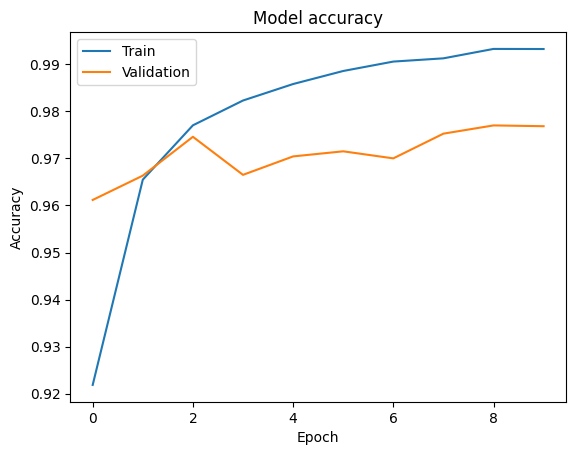

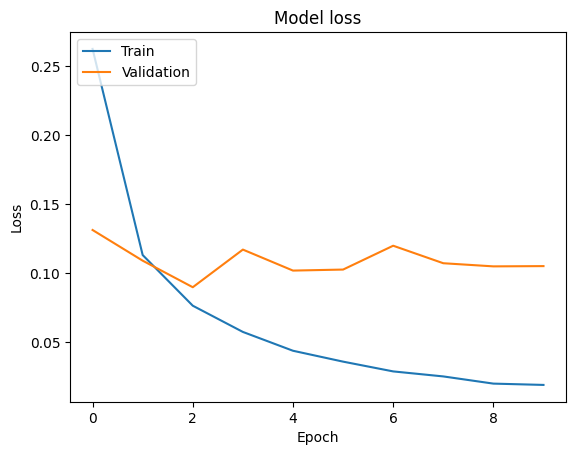

In [9]:
# Evaluate the model with the test data
test_loss, test_acc = model.evaluate(X_test, y_test)

print("Test accuracy:", test_acc)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
